In [1]:
import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import zconfint, DescrStatsW

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

filterwarnings("ignore")
sns.set()

# Analysing TMDB data

In [2]:
tmdb = pd.read_csv("data/archive/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Text(0.5, 1.0, 'TMDB average movie vote')

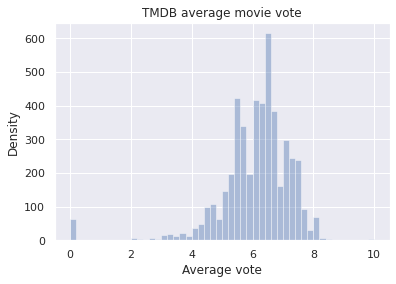

In [4]:
ax = sns.distplot(tmdb["vote_average"], norm_hist=False, kde=False)
ax.set(xlabel = "Average vote", ylabel = "Density")
ax.set_title("TMDB average movie vote")

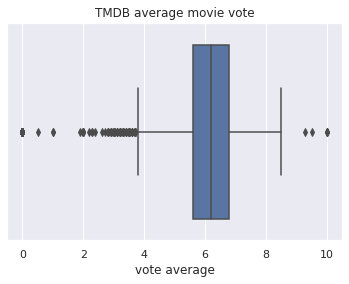

In [5]:
ax = sns.boxplot(data=tmdb, x="vote_average")
ax.set_title("TMDB average movie vote")
ax.set_xlabel("vote average");

The graphics above show that there are movies with vote average 0 and 10. 

That is unexpected, since we are working with average data (to be 0, all of the votes should be 0, and the same for average 10)

Let's get a closer look at these suspicious data.

In [6]:
tmdb.query("vote_average == 0")[["original_title", "vote_average", "vote_count"]].head(10)
# tmdb.loc[tmdb["vote_average"] == 0][["original_title", "vote_average", "vote_count"]]

,original_title,vote_average,vote_count
1464,Black Water Transit,0.0,0
3669,Should've Been Romeo,0.0,0
3670,Running Forever,0.0,0
3852,The Secret,0.0,0
3855,Time to Choose,0.0,0
3960,The Deported,0.0,0
3967,Four Single Fathers,0.0,0
4051,8 Days,0.0,0
4065,Mi America,0.0,0
4068,Sharkskin,0.0,0


In [7]:
tmdb.query("vote_average == 10")[["original_title", "vote_average", "vote_count"]]
# tmdb.loc[tmdb["vote_average"] == 0][["original_title", "vote_average", "vote_count"]]

,original_title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4045,"Dancer, Texas Pop. 81",10.0,1
4247,Me You and Five Bucks,10.0,2
4662,Little Big Top,10.0,1


As we can see on the tables above, there are some movies with very few votes (some with no vote).

Therefore, these movies won't be a part of our analysis from now on. 

Let's only consider movies with at least 10 votes!

In [8]:
tmdb_more_than_10_votes = tmdb.query("vote_count > 10")
tmdb_more_than_10_votes.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.358000e+03,4358.000000,4358.000000,4.358000e+03,4357.000000,4358.000000,4358.000000
mean,3.186705e+07,49112.662001,23.619184,9.059446e+07,108.496443,6.232010,760.249656
std,4.171009e+07,80167.435191,32.661510,1.687623e+08,21.000772,0.888111,1275.510839
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,11.000000
25%,3.000000e+06,8358.250000,6.719426,4.814275e+04,95.000000,5.700000,87.000000
50%,1.800000e+07,12960.500000,14.955512,2.744996e+07,105.000000,6.300000,292.000000
75%,4.300000e+07,46528.750000,30.433317,1.031351e+08,119.000000,6.800000,835.750000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


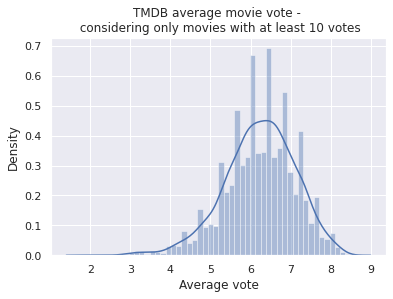

In [9]:
ax = sns.distplot(tmdb_more_than_10_votes["vote_average"])
ax.set(xlabel = "Average vote", ylabel = "Density")
ax.set_title("TMDB average movie vote - \n considering only movies with at least 10 votes");

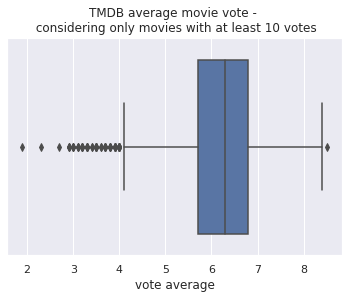

In [10]:
ax = sns.boxplot(data=tmdb_more_than_10_votes, x="vote_average")
ax.set_title("TMDB average movie vote - \n considering only movies with at least 10 votes")
ax.set_xlabel("vote average");

# Analysing MovieLens data

Let's cross our movie data from TMDB with data from MovieLens.

In [11]:
ratings = pd.read_csv("data/ml-latest-small/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Since there is no "vote_average"-like column, let's get it from the "rating" column, grouping the average rating by the movieId.

In [12]:
avg_rating_by_movie = ratings.groupby('movieId').agg({'rating': 'mean'})
avg_rating_by_movie.rename(columns = {'rating': 'avg_rating'}, inplace=True)
avg_rating_by_movie.head()

,avg_rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


Text(0.5, 1.0, 'MovieLens average movie rating')

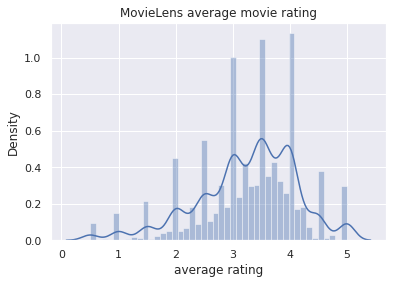

In [13]:
ax = sns.distplot(avg_rating_by_movie["avg_rating"])
ax.set(xlabel = "average rating", ylabel = "Density")
ax.set_title("MovieLens average movie rating")

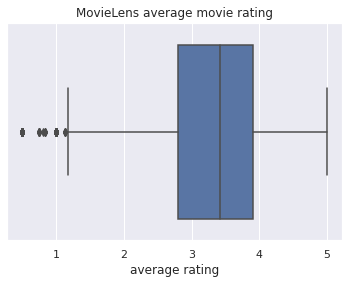

In [14]:
ax = sns.boxplot(data=avg_rating_by_movie, x="avg_rating")
ax.set_title("MovieLens average movie rating")
ax.set_xlabel("average rating");

As we can see from the charts above, there are some movies with average rating 5.

From the same argument used on TMDB data, let's take a closer look at this 5 average rated movies.

This time, we don't have a column containing information about the number of votes a movie received. So, let's compute it.

In [15]:
ratings_count_by_movie = ratings.groupby('movieId').agg({'userId': 'count'}).sort_values(by='userId', ascending=False)
ratings_count_by_movie = ratings_count_by_movie.rename(columns={'userId': 'ratings_count'})
ratings_count_by_movie.head()

,ratings_count
movieId,
356,329
318,317
296,307
593,279
2571,278


Let's only consider movies with at least 10 votes.

In [16]:
# ids from movies with at least 10 votes
ratings_count_by_movie_more_than_10 = ratings_count_by_movie.query("ratings_count >= 10")
movie_ids_from_at_least_10_votes = ratings_count_by_movie_more_than_10.index.values

In [17]:
# average rating from movies with at least 10 votes
avg_rating_by_movie_at_least_10 = avg_rating_by_movie.loc[movie_ids_from_at_least_10_votes]
avg_rating_by_movie_at_least_10.head()

,avg_rating
movieId,
356,4.164134
318,4.429022
296,4.197068
593,4.161290
2571,4.192446


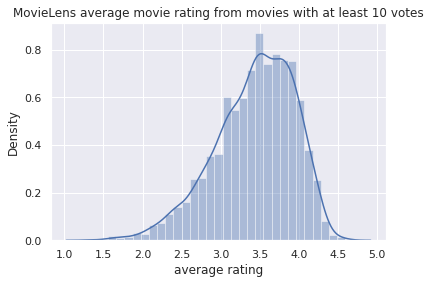

In [18]:
ax = sns.distplot(avg_rating_by_movie_at_least_10["avg_rating"])
ax.set(xlabel = "average rating", ylabel = "Density")
ax.set_title("MovieLens average movie rating from movies with at least 10 votes");

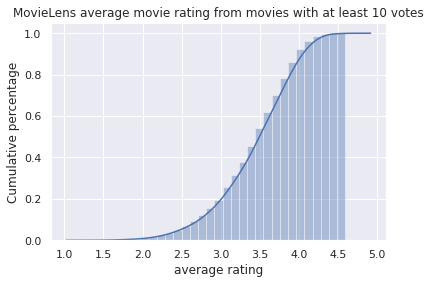

In [19]:
ax = sns.distplot(avg_rating_by_movie_at_least_10["avg_rating"], 
                    hist_kws={'cumulative': True}, 
                    kde_kws={'cumulative': True})
ax.set(xlabel = "average rating", ylabel = "Cumulative percentage")
ax.set_title("MovieLens average movie rating from movies with at least 10 votes");

There a few insights we can get from the CDF above that the distribution plot can't.

For example, we can see that about 50% of the movies have a rating less than 3.5. 

Likewise, if a movie has an average rating of 3.9, the CDF shows that it is above 80% of the movies.

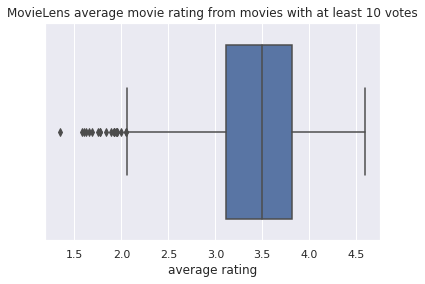

In [20]:
ax = sns.boxplot(data=avg_rating_by_movie_at_least_10, x="avg_rating")
ax.set_title("MovieLens average movie rating from movies with at least 10 votes")
ax.set_xlabel("average rating");

# Analysing other features from TMDB data

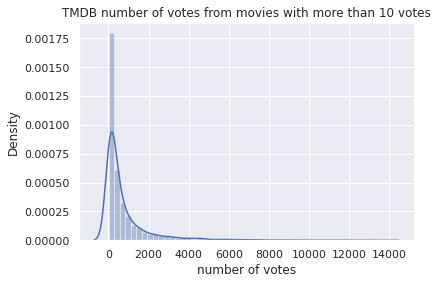

In [21]:
ax = sns.distplot(tmdb_more_than_10_votes['vote_count'])
ax.set(xlabel = "number of votes", ylabel = "Density")
ax.set_title("TMDB number of votes from movies with more than 10 votes");

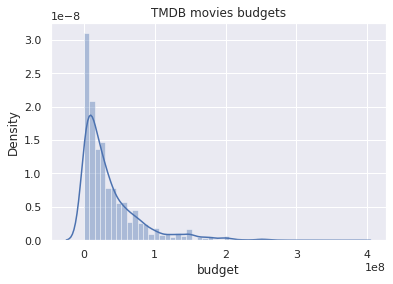

In [22]:
ax = sns.distplot(tmdb.query("budget > 0")['budget'])
ax.set(xlabel = "budget", ylabel = "Density")
ax.set_title("TMDB movies budgets");

In [23]:
tmdb.query("popularity == 0")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


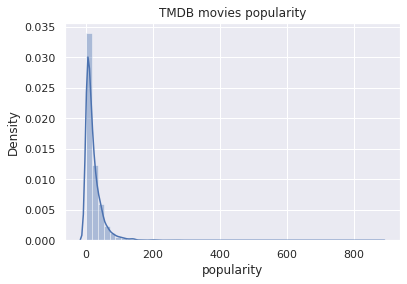

In [24]:
ax = sns.distplot(tmdb['popularity'])
ax.set(xlabel = "popularity", ylabel = "Density")
ax.set_title("TMDB movies popularity");

In [25]:
tmdb[tmdb.runtime.isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0


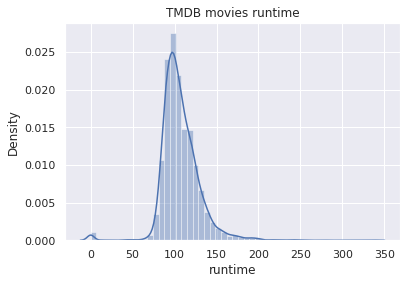

In [26]:
ax = sns.distplot(tmdb['runtime'].dropna())
ax.set(xlabel = "runtime", ylabel = "Density")
ax.set_title("TMDB movies runtime");

The distribution plot above shows a peak of zero values. Let's remove them and pot it again.

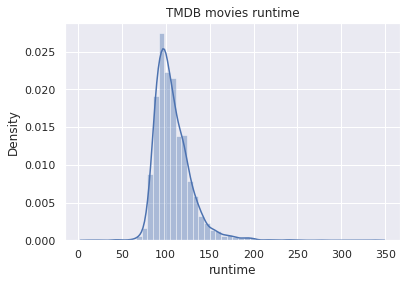

In [27]:
ax = sns.distplot(tmdb.query("runtime > 0").runtime.dropna())
ax.set(xlabel = "runtime", ylabel = "Density")
ax.set_title("TMDB movies runtime");

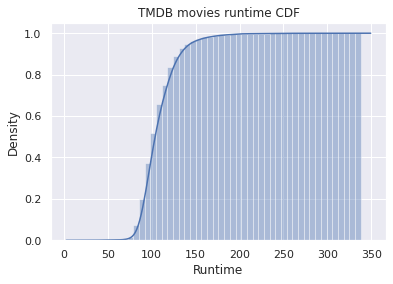

In [28]:
ax = sns.distplot(tmdb.query("runtime>0").runtime.dropna(),
                 hist_kws={'cumulative':True},
                 kde_kws={'cumulative':True})
ax.set(xlabel='Runtime', ylabel='Density')
ax.set_title('TMDB movies runtime CDF');

From the Cumulative Distribution Function lot above, we can visually infer, for instance, that 40% of the movies have a runtime less than 100 minutes.

Let's confirm that inference using the <em>quantile()</em> method.

In [29]:
tmdb.query("runtime > 0").runtime.dropna().quantile(q=0.4)

100.0

# Movielens: movies with at least 10 votes vote average

In [43]:
avg_rtng = round(avg_rating_by_movie_at_least_10.mean()[0], 3)
print(f"Average rating from movies with at least 10 votes: {avg_rtng}")

Average rating from movies with at least 10 votes: 3.432


In [44]:
np.random.seed(42)
temp = avg_rating_by_movie_at_least_10.sample(frac=1) # random order

means = [temp[0:i].mean() for i in range(1, len(temp))]

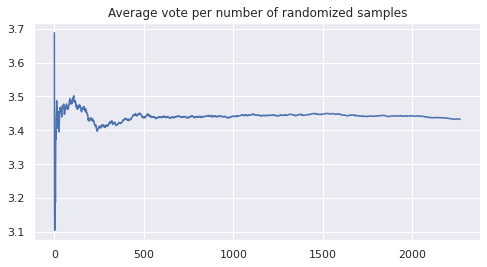

In [32]:
plt.figure(figsize = (8, 4))
plt.plot(means)
plt.title('Average vote per number of randomized samples');

As we can see in the chart above, the more data we use, the less changes occur when adding new data. In other words, **the more data we use, higher the confidence of our mean result**.

* Let's see what interval gives us the higher confidence, i.e., let's find the confidence interval.

In [46]:
# find the confidence interval based on the z-test
zconfint(avg_rating_by_movie_at_least_10)

(array([3.41124595]), array([3.45285473]))

In [47]:
# find the confidence interval based on the t-test
descr_movies_at_least_10 = DescrStatsW(avg_rating_by_movie_at_least_10)
descr_movies_at_least_10.tconfint_mean()

(array([3.41123484]), array([3.45286584]))